In [10]:
import os
import pandas as pd
import numpy as np
from astropy import units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
#%matplotlib widget
import scipy
from astropy.cosmology import Planck13

table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/table 2 core sizes match spectral index.csv')

source_name = table.name.values
size_2 = table.theta_2.values
size_err_2 = table.theta_err_2.values
size_5 = table.theta_5.values
size_err_5 = table.theta_err_5.values
size_8 = table.theta_8.values
size_err_8 = table.theta_err_8.values
size_15 = table.theta_15.values
size_err_15 = table.theta_err_15.values
size_24 = table.theta_24.values
size_err_24 = table.theta_err_24.values
size_43 = table.theta_43.values
size_err_43 = table.theta_err_43.values
z = table.z.values
alpha = table.alpha.values   # radio-mm spectral index
alphaRad = table.alphaRad.values   # radio-mm spectral index
alphaK = table.alphaK.values
alphaRadK = table.alphaRadK.values
source_type = table.class_name.values

ang_dis_MPC = Planck13.angular_diameter_distance(z).value # [Mpc]
ang_dis_PC = ang_dis_MPC*1.0E6   # [pc]

rad = (1/3600)*1E-3*(np.pi/180)

phy_size_2 = size_2*ang_dis_PC*rad
phy_size_err_2 = size_err_5*ang_dis_PC*rad
phy_size_5 = size_5*ang_dis_PC*rad
phy_size_err_5 = size_err_8*ang_dis_PC*rad
phy_size_8 = size_8*ang_dis_PC*rad
phy_size_err_8 = size_err_15*ang_dis_PC*rad
phy_size_15 = size_15*ang_dis_PC*rad
phy_size_err_15 = size_err_15*ang_dis_PC*rad
phy_size_24 = size_24*ang_dis_PC*rad
phy_size_err_24 = size_err_24*ang_dis_PC*rad
phy_size_43 = size_43*ang_dis_PC*rad
phy_size_err_43 = size_err_43*ang_dis_PC*rad

### Boostrap error estimation function
def Separman_boost_error(data1, data2):
    r_array = []

    for time in range(0, 500):
        random_index = np.random.randint(0, len(data1), len(data1))

        data1_boost = data1[random_index]
        data2_boost = data2[random_index]

        [r, p] = stats.spearmanr(data1_boost, data2_boost)

        r_array.append(r)

    boostrap_error = np.nanstd(r_array)
    
    return boostrap_error


2 GHz, r = -0.27 +/- 0.03, p = 8.26e-17, p1, source number = 894
5 GHz, r = -0.23 +/- 0.04, p = 2.80e-06, p1, source number = 422
8 GHz, r = -0.32 +/- 0.03, p = 2.13e-26, p1, source number = 1039
15 GHz, r = -0.40 +/- 0.05, p = 2.01e-14, p1, source number = 334
24 GHz, r = -0.21 +/- 0.07, p = 9.69e-03, p1, source number = 158
43 GHz, r = -0.32 +/- 0.08, p = 8.96e-05, p1, source number = 142


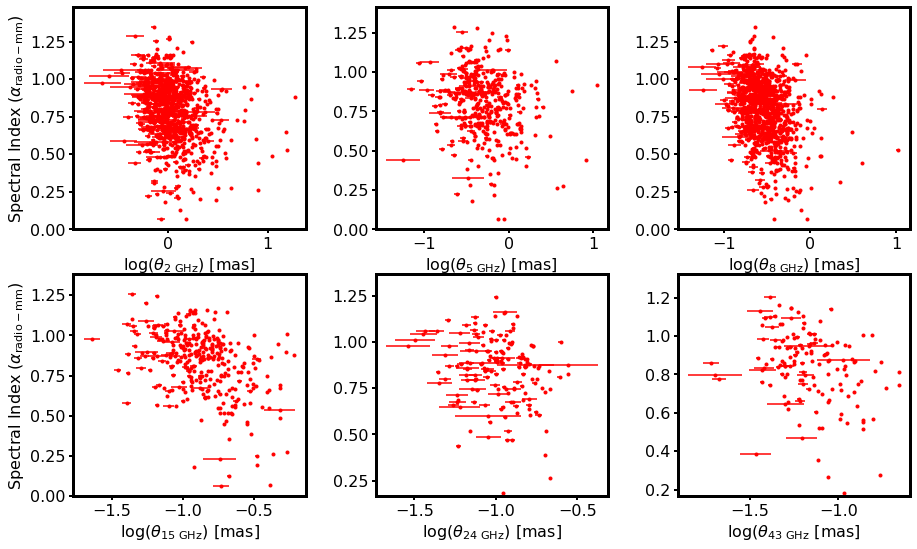

In [4]:
#######################################################################################################
### Koeyukova et al. (2022) observed core sizes v.s. radio-mm spectral index
### 2023/2/21 updated
#######################################################################################################
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 16)    
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.major.width'] = 2

fig, axs = plt.subplots(2, 3) # , sharey='row'

# 2 GHz
aa = ~np.isnan(alpha) & ~np.isnan(size_2)
notnan = np.where(aa == True)[0]
    
notnan_size2 = size_2[notnan]
notnan_size_err2 = size_err_2[notnan]
notnan_alpha = alpha[notnan]

[r1, p1] = stats.spearmanr(notnan_alpha, np.log10(notnan_size2))
r1_err = Separman_boost_error(notnan_alpha, np.log10(notnan_size2))
        
axs[0, 0].plot(np.log10(notnan_size2), notnan_alpha, '.', c = 'red', markersize = 6)
axs[0, 0].errorbar(np.log10(notnan_size2), notnan_alpha, xerr = 0.434*notnan_size_err2/notnan_size2, ecolor = "red", ls = '')

axs[0, 0].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[0, 0].set_ylim(np.nanmin(np.log10(notnan_size2))*0.9, np.nanmax(np.log10(notnan_size2))*1.1)
axs[0, 0].set(xlabel = 'log($\\theta_\mathrm{2\ GHz}$) [mas]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio-mm}$)')

# 5 GHz
aa = ~np.isnan(alpha) & ~np.isnan(size_5)
notnan = np.where(aa == True)[0]
    
notnan_size5 = size_5[notnan]
notnan_size_err5 = size_err_5[notnan]
notnan_alpha = alpha[notnan]

[r2, p2] = stats.spearmanr(notnan_alpha, np.log10(notnan_size5))
r2_err = Separman_boost_error(notnan_alpha, np.log10(notnan_size5))
        
axs[0, 1].plot(np.log10(notnan_size5), notnan_alpha, '.', c = 'red', markersize = 6)
axs[0, 1].errorbar(np.log10(notnan_size5), notnan_alpha, xerr = 0.434*notnan_size_err5/notnan_size5, ecolor = "red", ls = '')

axs[0, 1].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[0, 1].set_ylim(np.nanmin(notnan_size5)*0.9, np.nanmax(notnan_size5)*1.1)
axs[0, 1].set(xlabel = 'log($\\theta_\mathrm{5\ GHz}$) [mas]')

# 8 GHz
aa = ~np.isnan(alpha) & ~np.isnan(size_8)
notnan = np.where(aa == True)[0]
    
notnan_size8 = size_8[notnan]
notnan_size_err8 = size_err_8[notnan]
notnan_alpha = alpha[notnan]

[r3, p3] = stats.spearmanr(notnan_alpha, np.log10(notnan_size8))
r3_err = Separman_boost_error(notnan_alpha, np.log10(notnan_size8))
        
axs[0, 2].plot(np.log10(notnan_size8), notnan_alpha, '.', c = 'red', markersize = 6)
axs[0, 2].errorbar(np.log10(notnan_size8), notnan_alpha, xerr = 0.434*notnan_size_err8/notnan_size8, ecolor = "red", ls = '')

axs[0, 2].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[0, 2].set_ylim(np.nanmin(notnan_size8)*0.9, np.nanmax(notnan_size8)*1.1)
axs[0, 2].set(xlabel = 'log($\\theta_\mathrm{8\ GHz}$) [mas]')

# 15 GHz
aa = ~np.isnan(alpha) & ~np.isnan(size_15)
notnan = np.where(aa == True)[0]
    
notnan_size15 = size_15[notnan]
notnan_size_err15 = size_err_15[notnan]
notnan_alpha = alpha[notnan]

[r4, p4] = stats.spearmanr(notnan_alpha, np.log10(notnan_size15))
r4_err = Separman_boost_error(notnan_alpha, np.log10(notnan_size15))
        
axs[1, 0].plot(np.log10(notnan_size15), notnan_alpha, '.', c = 'red', markersize = 6)
axs[1, 0].errorbar(np.log10(notnan_size15), notnan_alpha, xerr = 0.434*notnan_size_err15/notnan_size15, ecolor = "red", ls = '')

axs[1, 0].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[1, 0].set_ylim(np.nanmin(notnan_size15)*0.9, np.nanmax(notnan_size15)*1.1)
axs[1, 0].set(xlabel = 'log($\\theta_\mathrm{15\ GHz}$) [mas]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio-mm}$)')

# 24 GHz
aa = ~np.isnan(alpha) & ~np.isnan(size_24)
notnan = np.where(aa == True)[0]
    
notnan_size24 = size_24[notnan]
notnan_size_err24 = size_err_24[notnan]
notnan_alpha = alpha[notnan]

[r5, p5] = stats.spearmanr(notnan_alpha, np.log10(notnan_size24))
r5_err = Separman_boost_error(notnan_alpha, np.log10(notnan_size24))

axs[1, 1].plot(np.log10(notnan_size24), notnan_alpha, '.', c = 'red', markersize = 6)
axs[1, 1].errorbar(np.log10(notnan_size24), notnan_alpha, xerr = 0.434*notnan_size_err24/notnan_size24, ecolor = "red", ls = '')

axs[1, 1].set_ylim(np.nanmin(notnan_alpha)*0.9, np.nanmax(notnan_alpha)*1.1)
#axs[1, 1].set_ylim(np.nanmin(notnan_size24)*0.9, np.nanmax(notnan_size24)*1.1)
axs[1, 1].set(xlabel = 'log($\\theta_\mathrm{24\ GHz}$) [mas]')

# 43 GHz
aa = ~np.isnan(alpha) & ~np.isnan(size_43)
notnan = np.where(aa == True)[0]
    
notnan_size43 = size_43[notnan]
notnan_size_err43 = size_err_43[notnan]
notnan_alpha = alpha[notnan]

[r6, p6] = stats.spearmanr(notnan_alpha, np.log10(notnan_size43))
r6_err = Separman_boost_error(notnan_alpha, np.log10(notnan_size43))
        
axs[1, 2].plot(np.log10(notnan_size43), notnan_alpha, '.', c = 'red', markersize = 6)
axs[1, 2].errorbar(np.log10(notnan_size43), notnan_alpha, xerr = 0.434*notnan_size_err43/notnan_size43, ecolor = "red", ls = '')

axs[1, 2].set_ylim(np.nanmin(notnan_alpha)*0.9, np.nanmax(notnan_alpha)*1.1)
#axs[1, 2].set_ylim(np.nanmin(notnan_size43)*0.9, np.nanmax(notnan_size43)*1.1)
axs[1, 2].set(xlabel = 'log($\\theta_\mathrm{43\ GHz}$ [mas]')

plt.subplots_adjust(hspace=0.2, wspace=0.3)

print('2 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r1, r1_err, p1, len(notnan_size2)))
print('5 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r2, r2_err, p2, len(notnan_size5)))
print('8 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r3, r3_err, p3, len(notnan_size8)))
print('15 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r4, r4_err, p4, len(notnan_size15)))
print('24 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r5, r5_err, p5, len(notnan_size24)))
print('43 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r6, r6_err, p6, len(notnan_size43)))

#plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index vs core sizes/Radio-mm spectral index vs angular core sizes.pdf', bbox_inches = 'tight')



2 GHz, r = -0.19 +/- 0.04, p = 1.98e-07, p1, source number = 766
5 GHz, r = -0.12 +/- 0.05, p = 1.64e-02, p1, source number = 375
8 GHz, r = -0.11 +/- 0.03, p = 7.04e-04, p1, source number = 886
15 GHz, r = -0.03 +/- 0.06, p = 6.03e-01, p1, source number = 274
24 GHz, r = -0.08 +/- 0.09, p = 3.86e-01, p1, source number = 129
43 GHz, r = -0.01 +/- 0.09, p = 9.31e-01, p1, source number = 119


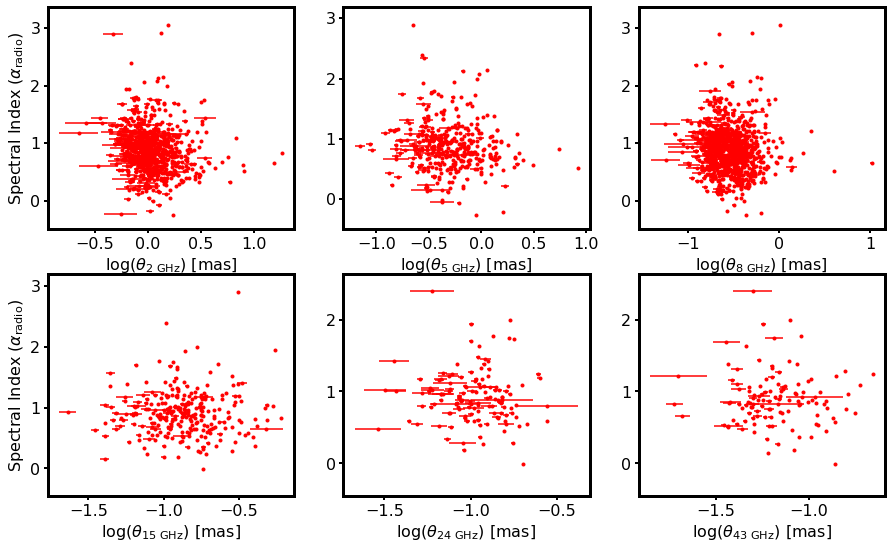

In [13]:
#######################################################################################################
### Koeyukova et al. (2022) observed core sizes v.s. radio spectral index
### 2023/2/21 updated
#######################################################################################################.

plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 16)    
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.major.width'] = 2

fig, axs = plt.subplots(2, 3) # , sharey='row'

# 2 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(size_2)
notnan = np.where(aa == True)[0]
    
notnan_size2 = size_2[notnan]
notnan_size_err2 = size_err_2[notnan]
notnan_alphaRad = alphaRad[notnan]

[r1, p1] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_size2))
r1_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_size2))
        
axs[0, 0].plot(np.log10(notnan_size2), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[0, 0].errorbar(np.log10(notnan_size2), notnan_alphaRad, xerr = 0.434*notnan_size_err2/notnan_size2, ecolor = "red", ls = '')

axs[0, 0].set_ylim(-0.5, np.nanmax(notnan_alphaRad)*1.1)
#axs[0, 0].set_ylim(np.nanmin(notnan_size2)*0.9, np.nanmax(notnan_size2)*1.1)
axs[0, 0].set(xlabel = 'log($\\theta_\mathrm{2\ GHz}$) [mas]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio}$)')

# 5 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(size_5)
notnan = np.where(aa == True)[0]
    
notnan_size5 = size_5[notnan]
notnan_size_err5 = size_err_5[notnan]
notnan_alphaRad = alphaRad[notnan]

[r2, p2] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_size5))
r2_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_size5))
        
axs[0, 1].plot(np.log10(notnan_size5), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[0, 1].errorbar(np.log10(notnan_size5), notnan_alphaRad, xerr = 0.434*notnan_size_err5/notnan_size5, ecolor = "red", ls = '')

axs[0, 1].set_ylim(-0.5, np.nanmax(notnan_alphaRad)*1.1)
#axs[0, 1].set_ylim(np.nanmin(notnan_size5)*0.9, np.nanmax(notnan_size5)*1.1)
axs[0, 1].set(xlabel = 'log($\\theta_\mathrm{5\ GHz}$) [mas]')

# 8 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(size_8)
notnan = np.where(aa == True)[0]
    
notnan_size8 = size_8[notnan]
notnan_size_err8 = size_err_8[notnan]
notnan_alphaRad = alphaRad[notnan]

[r3, p3] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_size8))
r3_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_size8))
        
axs[0, 2].plot(np.log10(notnan_size8), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[0, 2].errorbar(np.log10(notnan_size8), notnan_alphaRad, xerr = 0.434*notnan_size_err8/notnan_size8, ecolor = "red", ls = '')

axs[0, 2].set_ylim(-0.5, np.nanmax(notnan_alphaRad)*1.1)
#axs[0, 2].set_ylim(np.nanmin(notnan_size8)*0.9, np.nanmax(notnan_size8)*1.1)
axs[0, 2].set(xlabel = 'log($\\theta_\mathrm{8\ GHz}$) [mas]')

# 15 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(size_15)
notnan = np.where(aa == True)[0]
    
notnan_size15 = size_15[notnan]
notnan_size_err15 = size_err_15[notnan]
notnan_alphaRad = alphaRad[notnan]

[r4, p4] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_size15))
r4_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_size15))
        
axs[1, 0].plot(np.log10(notnan_size15), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[1, 0].errorbar(np.log10(notnan_size15), notnan_alphaRad, xerr = 0.434*notnan_size_err15/notnan_size15, ecolor = "red", ls = '')

axs[1, 0].set_ylim(np.nanmin(notnan_alphaRad)*0.9, np.nanmax(notnan_alphaRad)*1.1)
#axs[1, 0].set_ylim(np.nanmin(notnan_size15)*0.9, np.nanmax(notnan_size15)*1.1)
axs[1, 0].set(xlabel = 'log($\\theta_\mathrm{15\ GHz}$) [mas]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio}$)')

# 24 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(size_24)
notnan = np.where(aa == True)[0]
    
notnan_size24 = size_24[notnan]
notnan_size_err24 = size_err_24[notnan]
notnan_alphaRad = alphaRad[notnan]

[r5, p5] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_size24))
r5_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_size24))
        
axs[1, 1].plot(np.log10(notnan_size24), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[1, 1].errorbar(np.log10(notnan_size24), notnan_alphaRad, xerr = 0.434*notnan_size_err24/notnan_size24, ecolor = "red", ls = '')

axs[1, 1].set_ylim(np.nanmin(notnan_alphaRad)*0.9, np.nanmax(notnan_alphaRad)*1.1)
#axs[1, 1].set_ylim(np.nanmin(notnan_size24)*0.9, np.nanmax(notnan_size24)*1.1)
axs[1, 1].set(xlabel = 'log($\\theta_\mathrm{24\ GHz}$) [mas]')

# 43 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(size_43)
notnan = np.where(aa == True)[0]
    
notnan_size43 = size_43[notnan]
notnan_size_err43 = size_err_43[notnan]
notnan_alphaRad = alphaRad[notnan]

[r6, p6] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_size43))
r6_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_size43))
        
axs[1, 2].plot(np.log10(notnan_size43), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[1, 2].errorbar(np.log10(notnan_size43), notnan_alphaRad, xerr = 0.434*notnan_size_err43/notnan_size43, ecolor = "red", ls = '')

axs[1, 2].set_ylim(np.nanmin(notnan_alphaRad)*0.9, np.nanmax(notnan_alphaRad)*1.1)
#axs[1, 2].set_ylim(np.nanmin(notnan_size43)*0.9, np.nanmax(notnan_size43)*1.1)
axs[1, 2].set(xlabel = 'log($\\theta_\mathrm{43\ GHz}$) [mas]')

#plt.subplots_adjust(hspace=0.2, wspace=0.3)

print('2 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r1, r1_err, p1, len(notnan_size2)))
print('5 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r2, r2_err, p2, len(notnan_size5)))
print('8 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r3, r3_err, p3, len(notnan_size8)))
print('15 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r4, r4_err, p4, len(notnan_size15)))
print('24 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r5, r5_err, p5, len(notnan_size24)))
print('43 GHz, r = %4.2f +/- %4.2f, p = %4.2e, p1, source number = %s' %(r6, r6_err, p6, len(notnan_size43)))

plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index vs core sizes/Radio spectral index vs angular core sizes.pdf', bbox_inches = 'tight')


In [ ]:
#######################################################################################################
### Koeyukova et al. (2022) observed core sizes v.s. K-corrected radio-mm spectral index
#######################################################################################################
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.major.width'] = 2

fig, axs = plt.subplots(2, 3) # , sharey='row'

# 2 GHz
aa = ~np.isnan(alphaK) & ~np.isnan(size_2)
notnan = np.where(aa == True)[0]
    
notnan_size2 = size_2[notnan]
notnan_size_err2 = size_err_2[notnan]
notnan_alphaK = alphaK[notnan]

[r1, p1] = stats.spearmanr(notnan_alphaK, notnan_size2)
        
axs[0, 0].plot(notnan_alphaK, notnan_size2, '.', c = 'red', markersize = 6)
axs[0, 0].errorbar(notnan_alphaK, notnan_size2, yerr = notnan_size_err2, ecolor = "red", ls = '')

axs[0, 0].set_xlim(np.nanmin(notnan_alphaK)*0.9, np.nanmax(notnan_alphaK)*1.1)
axs[0, 0].set_ylim(np.nanmin(notnan_size2)*0.9, np.nanmax(notnan_size2)*1.1)
axs[0, 0].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{2\ GHz}$ (mas)', yscale = 'log')

# 5 GHz
aa = ~np.isnan(alphaK) & ~np.isnan(size_5)
notnan = np.where(aa == True)[0]
    
notnan_size5 = size_5[notnan]
notnan_size_err5 = size_err_5[notnan]
notnan_alphaK = alphaK[notnan]

[r2, p2] = stats.spearmanr(notnan_alphaK, notnan_size5)
        
axs[0, 1].plot(notnan_alphaK, notnan_size5, '.', c = 'red', markersize = 6)
axs[0, 1].errorbar(notnan_alphaK, notnan_size5, yerr = notnan_size_err5, ecolor = "red", ls = '')

axs[0, 1].set_xlim(np.nanmin(notnan_alphaK)*0.9, np.nanmax(notnan_alphaK)*1.1)
axs[0, 1].set_ylim(np.nanmin(notnan_size5)*0.9, np.nanmax(notnan_size5)*1.1)
axs[0, 1].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{5\ GHz}$ (mas)', yscale = 'log')

# 8 GHz
aa = ~np.isnan(alphaK) & ~np.isnan(size_8)
notnan = np.where(aa == True)[0]
    
notnan_size8 = size_8[notnan]
notnan_size_err8 = size_err_8[notnan]
notnan_alphaK = alphaK[notnan]

[r3, p3] = stats.spearmanr(notnan_alphaK, notnan_size8)
        
axs[0, 2].plot(notnan_alphaK, notnan_size8, '.', c = 'red', markersize = 6)
axs[0, 2].errorbar(notnan_alphaK, notnan_size8, yerr = notnan_size_err8, ecolor = "red", ls = '')

axs[0, 2].set_xlim(np.nanmin(notnan_alphaK)*0.9, np.nanmax(notnan_alphaK)*1.1)
axs[0, 2].set_ylim(np.nanmin(notnan_size8)*0.9, np.nanmax(notnan_size8)*1.1)
axs[0, 2].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{8\ GHz}$ (mas)', yscale = 'log')

# 15 GHz
aa = ~np.isnan(alphaK) & ~np.isnan(size_15)
notnan = np.where(aa == True)[0]
    
notnan_size15 = size_15[notnan]
notnan_size_err15 = size_err_15[notnan]
notnan_alphaK = alphaK[notnan]

[r4, p4] = stats.spearmanr(notnan_alphaK, notnan_size15)
        
axs[1, 0].plot(notnan_alphaK, notnan_size15, '.', c = 'red', markersize = 6)
axs[1, 0].errorbar(notnan_alphaK, notnan_size15, yerr = notnan_size_err15, ecolor = "red", ls = '')

axs[1, 0].set_xlim(np.nanmin(notnan_alphaK)*0.9, np.nanmax(notnan_alphaK)*1.1)
axs[1, 0].set_ylim(np.nanmin(notnan_size15)*0.9, np.nanmax(notnan_size15)*1.1)
axs[1, 0].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{15\ GHz}$ (mas)', yscale = 'log')

# 24 GHz
aa = ~np.isnan(alphaK) & ~np.isnan(size_24)
notnan = np.where(aa == True)[0]
    
notnan_size24 = size_24[notnan]
notnan_size_err24 = size_err_24[notnan]
notnan_alphaK = alphaK[notnan]

[r5, p5] = stats.spearmanr(notnan_alphaK, notnan_size24)
        
axs[1, 1].plot(notnan_alphaK, notnan_size24, '.', c = 'red', markersize = 6)
axs[1, 1].errorbar(notnan_alphaK, notnan_size24, yerr = notnan_size_err24, ecolor = "red", ls = '')

axs[1, 1].set_xlim(np.nanmin(notnan_alphaK)*0.9, np.nanmax(notnan_alphaK)*1.1)
axs[1, 1].set_ylim(np.nanmin(notnan_size24)*0.9, np.nanmax(notnan_size24)*1.1)
axs[1, 1].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{24\ GHz}$ (mas)', yscale = 'log')

# 43 GHz
aa = ~np.isnan(alphaK) & ~np.isnan(size_43)
notnan = np.where(aa == True)[0]
    
notnan_size43 = size_43[notnan]
notnan_size_err43 = size_err_43[notnan]
notnan_alphaK = alphaK[notnan]

[r6, p6] = stats.spearmanr(notnan_alphaK, notnan_size43)
        
axs[1, 2].plot(notnan_alphaK, notnan_size43, '.', c = 'red', markersize = 6)
axs[1, 2].errorbar(notnan_alphaK, notnan_size43, yerr = notnan_size_err43, ecolor = "red", ls = '')

axs[1, 2].set_xlim(np.nanmin(notnan_alphaK)*0.9, np.nanmax(notnan_alphaK)*1.1)
axs[1, 2].set_ylim(np.nanmin(notnan_size43)*0.9, np.nanmax(notnan_size43)*1.1)
axs[1, 2].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{43\ GHz}$ (mas)', yscale = 'log')

#plt.subplots_adjust(hspace=0.2, wspace=0.3)

print('2 GHz, r = %4.2f, p = %4.2e, p1, source number = %s' %(r1, p1, len(notnan_size2)))
print('5 GHz, r = %4.2f, p = %4.2e, p1, source number = %s' %(r2, p2, len(notnan_size5)))
print('8 GHz, r = %4.2f, p = %4.2e, p1, source number = %s' %(r3, p3, len(notnan_size8)))
print('15 GHz, r = %4.2f, p = %4.2e, p1, source number = %s' %(r4, p4, len(notnan_size15)))
print('24 GHz, r = %4.2f, p = %4.2e, p1, source number = %s' %(r5, p5, len(notnan_size24)))
print('43 GHz, r = %4.2f, p = %4.2e, p1, source number = %s' %(r6, p6, len(notnan_size43)))


In [ ]:
#######################################################################################################
### Koeyukova et al. (2022) observed core sizes v.s. K-cprrected radio spectral index
#######################################################################################################
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 14)    
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.major.width'] = 2

fig, axs = plt.subplots(2, 3) # , sharey='row'

# 2 GHz
aa = ~np.isnan(alphaRadK) & ~np.isnan(size_2)
notnan = np.where(aa == True)[0]
    
notnan_size2 = size_2[notnan]
notnan_size_err2 = size_err_2[notnan]
notnan_alphaRadK = alphaRadK[notnan]

[r1, p1] = stats.spearmanr(notnan_alphaRadK, notnan_size2)
        
axs[0, 0].plot(notnan_alphaRadK, notnan_size2, '.', c = 'red', markersize = 6)
axs[0, 0].errorbar(notnan_alphaRadK, notnan_size2, yerr = notnan_size_err2, ecolor = "red", ls = '')

axs[0, 0].set_xlim(np.nanmin(notnan_alphaRadK)*0.9, np.nanmax(notnan_alphaRadK)*1.1)
axs[0, 0].set_ylim(np.nanmin(notnan_size2)*0.9, np.nanmax(notnan_size2)*1.1)
axs[0, 0].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{2\ GHz}$ (mas)', yscale = 'log')

# 5 GHz
aa = ~np.isnan(alphaRadK) & ~np.isnan(size_5)
notnan = np.where(aa == True)[0]
    
notnan_size5 = size_5[notnan]
notnan_size_err5 = size_err_5[notnan]
notnan_alphaRadK = alphaRadK[notnan]

[r2, p2] = stats.spearmanr(notnan_alphaRadK, notnan_size5)
        
axs[0, 1].plot(notnan_alphaRadK, notnan_size5, '.', c = 'red', markersize = 6)
axs[0, 1].errorbar(notnan_alphaRadK, notnan_size5, yerr = notnan_size_err5, ecolor = "red", ls = '')

axs[0, 1].set_xlim(np.nanmin(notnan_alphaRadK)*0.9, np.nanmax(notnan_alphaRadK)*1.1)
axs[0, 1].set_ylim(np.nanmin(notnan_size5)*0.9, np.nanmax(notnan_size5)*1.1)
axs[0, 1].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{5\ GHz}$ (mas)', yscale = 'log')

# 8 GHz
aa = ~np.isnan(alphaRadK) & ~np.isnan(size_8)
notnan = np.where(aa == True)[0]
    
notnan_size8 = size_8[notnan]
notnan_size_err8 = size_err_8[notnan]
notnan_alphaRadK = alphaRadK[notnan]

[r3, p3] = stats.spearmanr(notnan_alphaRadK, notnan_size8)
        
axs[0, 2].plot(notnan_alphaRadK, notnan_size8, '.', c = 'red', markersize = 6)
axs[0, 2].errorbar(notnan_alphaRadK, notnan_size8, yerr = notnan_size_err8, ecolor = "red", ls = '')

axs[0, 2].set_xlim(np.nanmin(notnan_alphaRadK)*0.9, np.nanmax(notnan_alphaRadK)*1.1)
axs[0, 2].set_ylim(np.nanmin(notnan_size8)*0.9, np.nanmax(notnan_size8)*1.1)
axs[0, 2].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{8\ GHz}$ (mas)', yscale = 'log')

# 15 GHz
aa = ~np.isnan(alphaRadK) & ~np.isnan(size_15)
notnan = np.where(aa == True)[0]
    
notnan_size15 = size_15[notnan]
notnan_size_err15 = size_err_15[notnan]
notnan_alphaRadK = alphaRadK[notnan]

[r4, p4] = stats.spearmanr(notnan_alphaRadK, notnan_size15)
        
axs[1, 0].plot(notnan_alphaRadK, notnan_size15, '.', c = 'red', markersize = 6)
axs[1, 0].errorbar(notnan_alphaRadK, notnan_size15, yerr = notnan_size_err15, ecolor = "red", ls = '')

axs[1, 0].set_xlim(np.nanmin(notnan_alphaRadK)*0.9, np.nanmax(notnan_alphaRadK)*1.1)
axs[1, 0].set_ylim(np.nanmin(notnan_size15)*0.9, np.nanmax(notnan_size15)*1.1)
axs[1, 0].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{15\ GHz}$ (mas)', yscale = 'log')

# 24 GHz
aa = ~np.isnan(alphaRadK) & ~np.isnan(size_24)
notnan = np.where(aa == True)[0]
    
notnan_size24 = size_24[notnan]
notnan_size_err24 = size_err_24[notnan]
notnan_alphaRadK = alphaRadK[notnan]

[r5, p5] = stats.spearmanr(notnan_alphaRadK, notnan_size24)
        
axs[1, 1].plot(notnan_alphaRadK, notnan_size24, '.', c = 'red', markersize = 6)
axs[1, 1].errorbar(notnan_alphaRadK, notnan_size24, yerr = notnan_size_err24, ecolor = "red", ls = '')

axs[1, 1].set_xlim(np.nanmin(notnan_alphaRadK)*0.9, np.nanmax(notnan_alphaRadK)*1.1)
axs[1, 1].set_ylim(np.nanmin(notnan_size24)*0.9, np.nanmax(notnan_size24)*1.1)
axs[1, 1].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{24\ GHz}$ (mas)', yscale = 'log')

# 43 GHz
aa = ~np.isnan(alphaRadK) & ~np.isnan(size_43)
notnan = np.where(aa == True)[0]
    
notnan_size43 = size_43[notnan]
notnan_size_err43 = size_err_43[notnan]
notnan_alphaRadK = alphaRadK[notnan]

[r6, p6] = stats.spearmanr(notnan_alphaRadK, notnan_size43)
        
axs[1, 2].plot(notnan_alphaRadK, notnan_size43, '.', c = 'red', markersize = 6)
axs[1, 2].errorbar(notnan_alphaRadK, notnan_size43, yerr = notnan_size_err43, ecolor = "red", ls = '')

axs[1, 2].set_xlim(np.nanmin(notnan_alphaRadK)*0.9, np.nanmax(notnan_alphaRadK)*1.1)
axs[1, 2].set_ylim(np.nanmin(notnan_size43)*0.9, np.nanmax(notnan_size43)*1.1)
axs[1, 2].set(xlabel = 'Spectral Index', ylabel = '$\\theta_\mathrm{43\ GHz}$ (mas)', yscale = 'log')

plt.subplots_adjust(hspace=0.2, wspace=0.3)

print('2 GHz, r = %4.2f, p = %4.2e, source number = %s' %(r1, p1, len(notnan_size2)))
print('5 GHz, r = %4.2f, p = %4.2e, source number = %s' %(r2, p2, len(notnan_size5)))
print('8 GHz, r = %4.2f, p = %4.2e, source number = %s' %(r3, p3, len(notnan_size8)))
print('15 GHz, r = %4.2f, p = %4.2e, source number = %s' %(r4, p4, len(notnan_size15)))
print('24 GHz, r = %4.2f, p = %4.2e, source number = %s' %(r5, p5, len(notnan_size24)))
print('43 GHz, r = %4.2f, p = %4.2e, source number = %s' %(r6, p6, len(notnan_size43)))


2 GHz, r = -0.29 +/- 0.03, p = 2.59e-17, source number = 843
5 GHz, r = -0.22 +/- 0.05, p = 1.31e-05, source number = 394
8 GHz, r = -0.31 +/- 0.03, p = 4.24e-23, source number = 979
15 GHz, r = -0.38 +/- 0.05, p = 4.98e-12, source number = 314
24 GHz, r = -0.31 +/- 0.07, p = 1.14e-04, source number = 148
43 GHz, r = -0.29 +/- 0.08, p = 7.53e-04, source number = 133


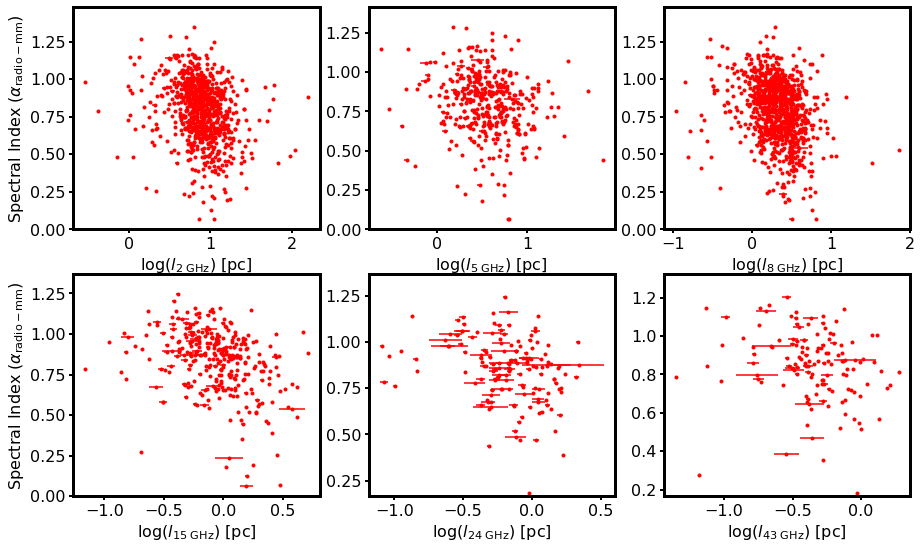

In [7]:
#######################################################################################################
### Koeyukova et al. (2022) physical core sizes v.s. radio-mm spectral index
#######################################################################################################

plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 16)    
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.major.width'] = 2

fig, axs = plt.subplots(2, 3) # , sharey='row'

# 2 GHz
aa = ~np.isnan(alpha) & ~np.isnan(phy_size_2)
notnan = np.where(aa == True)[0]
    
notnan_phy_size2 = phy_size_2[notnan]
notnan_phy_size_err2 = phy_size_err_2[notnan]
notnan_alpha = alpha[notnan]

[r1, p1] = stats.spearmanr(notnan_alpha, np.log10(notnan_phy_size2))
r1_err = Separman_boost_error(notnan_alpha, np.log10(notnan_phy_size2))
        
axs[0, 0].plot(np.log10(notnan_phy_size2), notnan_alpha, '.', c = 'red', markersize = 6)
axs[0, 0].errorbar(np.log10(notnan_phy_size2), notnan_alpha, xerr = 0.434*notnan_phy_size_err2/notnan_phy_size2, ecolor = "red", ls = '')

axs[0, 0].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[0, 0].set_ylim(np.nanmin(notnan_phy_size2)*0.9, np.nanmax(notnan_phy_size2)*1.1)
axs[0, 0].set(xlabel = 'log($l_\mathrm{2\ GHz}$) [pc]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio-mm}$)')

# 5 GHz
aa = ~np.isnan(alpha) & ~np.isnan(phy_size_5)
notnan = np.where(aa == True)[0]
    
notnan_phy_size5 = phy_size_5[notnan]
notnan_phy_size_err5 = phy_size_err_5[notnan]
notnan_alpha = alpha[notnan]

[r2, p2] = stats.spearmanr(notnan_alpha, np.log10(notnan_phy_size5))
r2_err = Separman_boost_error(notnan_alpha, np.log10(notnan_phy_size5))
        
axs[0, 1].plot(np.log10(notnan_phy_size5), notnan_alpha, '.', c = 'red', markersize = 6)
axs[0, 1].errorbar(np.log10(notnan_phy_size5), notnan_alpha, xerr = 0.434*notnan_phy_size_err5/notnan_phy_size5, ecolor = "red", ls = '')

axs[0, 1].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[0, 1].set_ylim(np.nanmin(notnan_phy_size5)*0.9, np.nanmax(notnan_phy_size5)*1.1)
axs[0, 1].set(xlabel = 'log($l_\mathrm{5\ GHz}$) [pc]')

# 8 GHz
aa = ~np.isnan(alpha) & ~np.isnan(phy_size_8)
notnan = np.where(aa == True)[0]
    
notnan_phy_size8 = phy_size_8[notnan]
notnan_phy_size_err8 = phy_size_err_8[notnan]
notnan_alpha = alpha[notnan]

[r3, p3] = stats.spearmanr(notnan_alpha, np.log10(notnan_phy_size8))
r3_err = Separman_boost_error(notnan_alpha, np.log10(notnan_phy_size8))
        
axs[0, 2].plot(np.log10(notnan_phy_size8), notnan_alpha, '.', c = 'red', markersize = 6)
axs[0, 2].errorbar(np.log10(notnan_phy_size8), notnan_alpha, xerr = 0.434*notnan_phy_size_err8/notnan_phy_size8, ecolor = "red", ls = '')

axs[0, 2].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[0, 2].set_ylim(np.nanmin(notnan_phy_size8)*0.9, np.nanmax(notnan_phy_size8)*1.1)
axs[0, 2].set(xlabel = 'log($l_\mathrm{8\ GHz}$) [pc]')

# 15 GHz
aa = ~np.isnan(alpha) & ~np.isnan(phy_size_15)
notnan = np.where(aa == True)[0]
    
notnan_phy_size15 = phy_size_15[notnan]
notnan_phy_size_err15 = phy_size_err_15[notnan]
notnan_alpha = alpha[notnan]

[r4, p4] = stats.spearmanr(notnan_alpha, np.log10(notnan_phy_size15))
r4_err = Separman_boost_error(notnan_alpha, np.log10(notnan_phy_size15))
        
axs[1, 0].plot(np.log10(notnan_phy_size15), notnan_alpha, '.', c = 'red', markersize = 6)
axs[1, 0].errorbar(np.log10(notnan_phy_size15), notnan_alpha, xerr = 0.434*notnan_phy_size_err15/notnan_phy_size15, ecolor = "red", ls = '')

axs[1, 0].set_ylim(0, np.nanmax(notnan_alpha)*1.1)
#axs[1, 0].set_ylim(np.nanmin(notnan_phy_size15)*0.9, np.nanmax(notnan_phy_size15)*1.1)
axs[1, 0].set(xlabel = 'log($l_\mathrm{15\ GHz}$) [pc]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio-mm}$)')

# 24 GHz
aa = ~np.isnan(alpha) & ~np.isnan(phy_size_24)
notnan = np.where(aa == True)[0]
    
notnan_phy_size24 = phy_size_24[notnan]
notnan_phy_size_err24 = phy_size_err_24[notnan]
notnan_alpha = alpha[notnan]

[r5, p5] = stats.spearmanr(notnan_alpha, np.log10(notnan_phy_size24))
r5_err = Separman_boost_error(notnan_alpha, np.log10(notnan_phy_size24))
        
axs[1, 1].plot(np.log10(notnan_phy_size24), notnan_alpha, '.', c = 'red', markersize = 6)
axs[1, 1].errorbar(np.log10(notnan_phy_size24), notnan_alpha, xerr = 0.434*notnan_phy_size_err24/notnan_phy_size24, ecolor = "red", ls = '')

axs[1, 1].set_ylim(np.nanmin(notnan_alpha)*0.9, np.nanmax(notnan_alpha)*1.1)
#axs[1, 1].set_ylim(np.nanmin(notnan_phy_size24)*0.9, np.nanmax(notnan_phy_size24)*1.1)
axs[1, 1].set(xlabel = 'log($l_\mathrm{24\ GHz}$) [pc]')

# 43 GHz
aa = ~np.isnan(alpha) & ~np.isnan(phy_size_43)
notnan = np.where(aa == True)[0]
    
notnan_phy_size43 = phy_size_43[notnan]
notnan_phy_size_err43 = phy_size_err_43[notnan]
notnan_alpha = alpha[notnan]

[r6, p6] = stats.spearmanr(notnan_alpha, np.log10(notnan_phy_size43))
r6_err = Separman_boost_error(notnan_alpha, np.log10(notnan_phy_size43))
        
axs[1, 2].plot(np.log10(notnan_phy_size43), notnan_alpha, '.', c = 'red', markersize = 6)
axs[1, 2].errorbar(np.log10(notnan_phy_size43), notnan_alpha, xerr = 0.434*notnan_phy_size_err43/notnan_phy_size43, ecolor = "red", ls = '')

axs[1, 2].set_ylim(np.nanmin(notnan_alpha)*0.9, np.nanmax(notnan_alpha)*1.1)
#axs[1, 2].set_ylim(np.nanmin(notnan_phy_size43)*0.9, np.nanmax(notnan_phy_size43)*1.1)
axs[1, 2].set(xlabel = 'log($l_\mathrm{43\ GHz}$) [pc]')

#plt.subplots_adjust(hspace=0.2, wspace=0.3)

print('2 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r1, r1_err, p1, len(notnan_phy_size2)))
print('5 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r2, r2_err, p2, len(notnan_phy_size5)))
print('8 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r3, r3_err, p3, len(notnan_phy_size8)))
print('15 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r4, r4_err, p4, len(notnan_phy_size15)))
print('24 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r5, r5_err, p5, len(notnan_phy_size24)))
print('43 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r6, r6_err, p6, len(notnan_phy_size43)))

#plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index vs core sizes/Radio-mm spectral index vs physical core sizes.pdf', bbox_inches = 'tight')



2 GHz, r = -0.11 +/- 0.04, p = 2.52e-03, source number = 730
5 GHz, r = -0.06 +/- 0.05, p = 2.60e-01, source number = 355
8 GHz, r = -0.04 +/- 0.03, p = 2.52e-01, source number = 843
15 GHz, r = -0.02 +/- 0.06, p = 7.64e-01, source number = 262
24 GHz, r = -0.05 +/- 0.09, p = 6.16e-01, source number = 124
43 GHz, r = 0.02 +/- 0.09, p = 8.59e-01, source number = 114


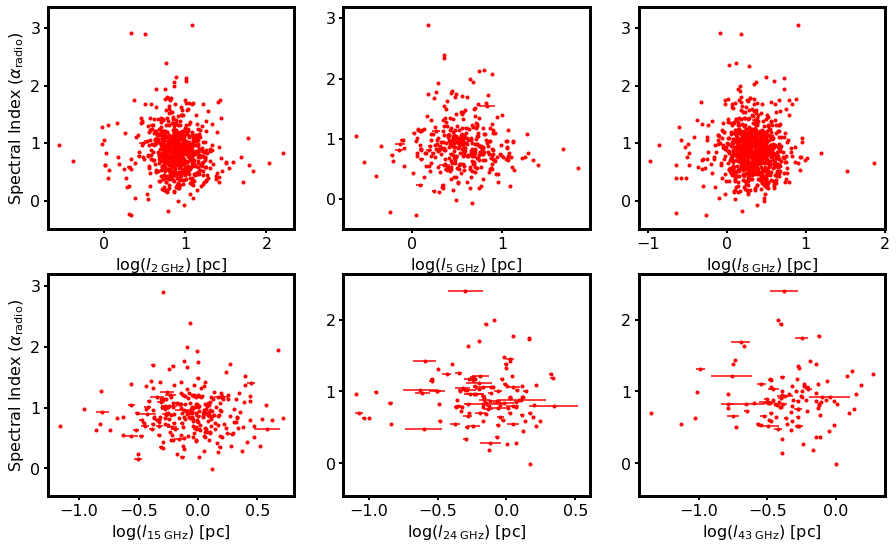

In [8]:
#######################################################################################################
### Koeyukova et al. (2022) physical core sizes v.s. radio spectral index
#######################################################################################################
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['axes.linewidth'] = 3
plt.rc('font', size = 16)    
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.major.width'] = 2

fig, axs = plt.subplots(2, 3) # , sharey='row'

# 2 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(phy_size_2)
notnan = np.where(aa == True)[0]
    
notnan_phy_size2 = phy_size_2[notnan]
notnan_phy_size_err2 = phy_size_err_2[notnan]
notnan_alphaRad = alphaRad[notnan]

[r1, p1] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_phy_size2))
r1_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_phy_size2))
        
axs[0, 0].plot(np.log10(notnan_phy_size2), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[0, 0].errorbar(np.log10(notnan_phy_size2), notnan_alphaRad, xerr = 0.434*notnan_phy_size_err2/notnan_phy_size2, ecolor = "red", ls = '')

axs[0, 0].set_ylim(-0.5, np.nanmax(notnan_alphaRad)*1.1)
#axs[0, 0].set_ylim(np.nanmin(notnan_phy_size2)*0.9, np.nanmax(notnan_phy_size2)*1.1)
axs[0, 0].set(xlabel = 'log($l_\mathrm{2\ GHz}$) [pc]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio}$)')

# 5 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(phy_size_5)
notnan = np.where(aa == True)[0]
    
notnan_phy_size5 = phy_size_5[notnan]
notnan_phy_size_err5 = phy_size_err_5[notnan]
notnan_alphaRad = alphaRad[notnan]

[r2, p2] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_phy_size5))
r2_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_phy_size5))
        
axs[0, 1].plot(np.log10(notnan_phy_size5), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[0, 1].errorbar(np.log10(notnan_phy_size5), notnan_alphaRad, xerr = 0.434*notnan_phy_size_err5/notnan_phy_size5, ecolor = "red", ls = '')

axs[0, 1].set_ylim(-0.5, np.nanmax(notnan_alphaRad)*1.1)
#axs[0, 1].set_ylim(np.nanmin(notnan_phy_size5)*0.9, np.nanmax(notnan_phy_size5)*1.1)
axs[0, 1].set(xlabel = 'log($l_\mathrm{5\ GHz}$) [pc]')

# 8 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(phy_size_8)
notnan = np.where(aa == True)[0]
    
notnan_phy_size8 = phy_size_8[notnan]
notnan_phy_size_err8 = phy_size_err_8[notnan]
notnan_alphaRad = alphaRad[notnan]

[r3, p3] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_phy_size8))
r3_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_phy_size8))
        
axs[0, 2].plot(np.log10(notnan_phy_size8), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[0, 2].errorbar(np.log10(notnan_phy_size8), notnan_alphaRad, xerr = 0.434*notnan_phy_size_err8/notnan_phy_size8, ecolor = "red", ls = '')

axs[0, 2].set_ylim(-0.5, np.nanmax(notnan_alphaRad)*1.1)
#axs[0, 2].set_ylim(np.nanmin(notnan_phy_size8)*0.9, np.nanmax(notnan_phy_size8)*1.1)
axs[0, 2].set(xlabel = 'log($l_\mathrm{8\ GHz}$) [pc]')

# 15 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(phy_size_15)
notnan = np.where(aa == True)[0]
    
notnan_phy_size15 = phy_size_15[notnan]
notnan_phy_size_err15 = phy_size_err_15[notnan]
notnan_alphaRad = alphaRad[notnan]

[r4, p4] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_phy_size15))
r4_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_phy_size15))
        
axs[1, 0].plot(np.log10(notnan_phy_size15), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[1, 0].errorbar(np.log10(notnan_phy_size15), notnan_alphaRad, xerr = 0.434*notnan_phy_size_err15/notnan_phy_size15, ecolor = "red", ls = '')

axs[1, 0].set_ylim(np.nanmin(notnan_alphaRad)*0.9, np.nanmax(notnan_alphaRad)*1.1)
#axs[1, 0].set_ylim(np.nanmin(notnan_phy_size15)*0.9, np.nanmax(notnan_phy_size15)*1.1)
axs[1, 0].set(xlabel = 'log($l_\mathrm{15\ GHz}$) [pc]', ylabel = 'Spectral Index ($\\alpha_\mathrm{radio}$)')

# 24 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(phy_size_24)
notnan = np.where(aa == True)[0]
    
notnan_phy_size24 = phy_size_24[notnan]
notnan_phy_size_err24 = phy_size_err_24[notnan]
notnan_alphaRad = alphaRad[notnan]

[r5, p5] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_phy_size24))
r5_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_phy_size24))
        
axs[1, 1].plot(np.log10(notnan_phy_size24), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[1, 1].errorbar(np.log10(notnan_phy_size24), notnan_alphaRad, xerr = 0.434*notnan_phy_size_err24/notnan_phy_size24, ecolor = "red", ls = '')

axs[1, 1].set_ylim(np.nanmin(notnan_alphaRad)*0.9, np.nanmax(notnan_alphaRad)*1.1)
#axs[1, 1].set_ylim(np.nanmin(notnan_phy_size24)*0.9, np.nanmax(notnan_phy_size24)*1.1)
axs[1, 1].set(xlabel = 'log($l_\mathrm{24\ GHz}$) [pc]')

# 43 GHz
aa = ~np.isnan(alphaRad) & ~np.isnan(phy_size_43)
notnan = np.where(aa == True)[0]
    
notnan_phy_size43 = phy_size_43[notnan]
notnan_phy_size_err43 = phy_size_err_43[notnan]
notnan_alphaRad = alphaRad[notnan]

[r6, p6] = stats.spearmanr(notnan_alphaRad, np.log10(notnan_phy_size43))
r6_err = Separman_boost_error(notnan_alphaRad, np.log10(notnan_phy_size43))
        
axs[1, 2].plot(np.log10(notnan_phy_size43), notnan_alphaRad, '.', c = 'red', markersize = 6)
axs[1, 2].errorbar(np.log10(notnan_phy_size43), notnan_alphaRad, xerr = 0.434*notnan_phy_size_err43/notnan_phy_size43, ecolor = "red", ls = '')

axs[1, 2].set_ylim(np.nanmin(notnan_alphaRad)*0.9, np.nanmax(notnan_alphaRad)*1.1)
#axs[1, 2].set_ylim(np.nanmin(notnan_phy_size43)*0.9, np.nanmax(notnan_phy_size43)*1.1)
axs[1, 2].set(xlabel = 'log($l_\mathrm{43\ GHz}$) [pc]')

print('2 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r1, r1_err, p1, len(notnan_phy_size2)))
print('5 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r2, r2_err, p2, len(notnan_phy_size5)))
print('8 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r3, r3_err, p3, len(notnan_phy_size8)))
print('15 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r4, r4_err, p4, len(notnan_phy_size15)))
print('24 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r5, r5_err, p5, len(notnan_phy_size24)))
print('43 GHz, r = %4.2f +/- %4.2f, p = %4.2e, source number = %s' %(r6, r6_err, p6, len(notnan_phy_size43)))

#plt.savefig('/Users/87steven/Documents/天文所/Master Thesis/figures/chapter 4/Spectral index vs core sizes/Radio spectral index vs physical core sizes.pdf', bbox_inches = 'tight')

